### Assignment 12 - Ruggiero Julian

#### Part I: Working with HTML, XML, and JSON

Pick three of your favorite books on one of your favorite subjects. At least one of the books should have more than one author. For each book, include the title, authors, and two or three other attributes that you find interesting. Take the information that you’ve selected about these three books, and separately create three files which store the book’s information in HTML (using an html table), XML, and JSON formats (e.g. “books.html”, “books.xml”, and “books.json”). To help you better understand the different file structures, I’d prefer that you create each of these files “by hand” unless you’re already very comfortable with the file formats. Write Python code, using your packages of choice, to load the information from each of the three sources into separate PANDAS data frames. Are the three data frames identical? Your deliverable is the three source files and the Python code. Post the three source files to GitHub and package your Python code within a Jupyter notebook (along with your code for Part II below) and post it to GitHub as well.

For this first task I have selected the 3 books listed below:
 - __Cosmos__, by Carl Sagan.
 - __A Brief History of Time__, by Stephen Hawking.
 - __Universe: The Definite Visual Guide__, by nine British co-authors, Robert Dinwiddie, Philip Eales, David Hughes, Iain Nicolson, Ian Ridpath, Giles Sparrow, Pam Spence, Carole Stott and Kevin Tildsley.

The html, xml and json files were created and loaded into GitHub.

In [58]:
import requests
import pandas as pd
import urllib.request
from lxml import objectify
import json

__From HTML__: https://github.com/gitjuli/DAV-5400/blob/master/Data/books_file.html

I will use the pandas read_html function to get the html and store in a dataframe. 

In [16]:
# reading HTML
tables = pd.read_html('https://raw.githubusercontent.com/gitjuli/DAV-5400/master/Data/books_file.html')
# getting the only table in the result
books_html = tables[0]
# adjust column width to see the entire string in the default representation
pd.options.display.max_colwidth = 150
books_html

,Title,Year Released,Publisher,Pages,Authors
0,Cosmos,1980,Random House,365,Carl Sagan
1,A brief history of time,1988,Bantam Dell Publishing Group,256,Stephen Hawking
2,Universe: The Definitive Visual Guide,2007,DK,528,"Robert Dinwiddie, Philip Eales, David Hughes, Iain Nicolson, Ian Ridpath, Giles Sparrow, Pam Spence, Carole Stott, Kevin Tildsley"


Each < tr > tag was mapped into a row and the < td > tags are the columns.

__From XML__: https://github.com/gitjuli/DAV-5400/blob/master/Data/books_file.xml

Will use the urllib to get the xml data and parse the content with lxml library.

In [17]:
# reading XML
# get the path and header info separately from the path
path, headers = urllib.request.urlretrieve('https://raw.githubusercontent.com/gitjuli/DAV-5400/master/Data/books_file.xml')
# parse the web page
parsed = objectify.parse(open(path))
# get a reference to the root node of the XML file
root = parsed.getroot()
# define an empty list that will be used to store the parsed data
data = []

The script below will get the child elements in the xml and, considering a book can have more than 1 author, it will iterate throw one extra level and create a list of authors.

In [18]:
# script to get the elements in the xml and fill in the list 'data' with dictionaries.
for elt in root.element:
     # for each record, create a dict of tag names
    el_data = {}
    for child in elt.getchildren():
        if len(child.getchildren()) >=1:
            #applies for authors tag
            authors=[]
            for ch in child.getchildren():
                authors.append(ch.pyval)
            el_data[child.tag] = authors
        else:
            el_data[child.tag] = child.pyval
    data.append(el_data)

In [19]:
books_xml = pd.DataFrame(data)
books_xml.head()

,Authors,Pages,Publisher,Title,Year_released
0,[Carl Sagan],365,Random House,Cosmos,1980
1,[Stephen Hawking],256,Bantam Dell Publishing Group,A brief history of time,1988
2,"[Robert Dinwiddie, Philip Eales, David Hughes, Iain Nicolson, Ian Ridpath, Giles Sparrow, Pam Spence, Carole Stott, Kevin Tildsley]",528,DK,Universe: The Definitive Visual Guide,2007


I can see that the dataframe created from the xml has its columns ordered alphabetically, so Authors is first and Year_released is the last one. Besides, after manipulating the parsed data the Authors records are in the form of a list.

__From JSON:__ https://github.com/gitjuli/DAV-5400/blob/master/Data/books_file.json

Will use the read_json function from pandas to get the json data.

In [31]:
# reading Json
data = pd.read_json(r'https://raw.githubusercontent.com/gitjuli/DAV-5400/master/Data/books_file.json')
data

,Authors,Pages,Publisher,Title,Year_released
0,[Carl Sagan],365,Random House,Cosmos,1980
1,[Stephen Hawking],256,Bantam Dell Publishing Group,A brief history of time,1988
2,"[Robert Dinwiddie, Philip Eales, David Hughes, Iain Nicolson, Ian Ridpath, Giles Sparrow, Pam Spence, Carole Stott, Kevin Tildsley]",528,DK,Universe: The Definitive Visual Guide,2007


Both the xml and json dataframe look the same, with the Authors column data in the form of a list. The dataframe with the HTML information contains the individual authors as a string and is its columns are not ordered alphabetically.

#### Part II: Working with Web API’s

The New York Times web site provides a rich set of APIs, as described here: https://developer.nytimes.com. You’ll need to start by signing up for an API key.
Your task is to then choose one of the New York Times APIs and construct an interface in Python to read JSON data accessible via the API and transform that data into a Pandas data frame that is suitable for use in data analysis work.

For this task I will work with the "Most Popular" API, which provide services for getting the most popular articles on NYTimes.com based on emails, shares, or views. An overview is in the link below:

https://developer.nytimes.com/docs/most-popular-product/1/overview

For getting the most shared articles on Facebook for the last day we can use this template:

https://api.nytimes.com/svc/mostpopular/v2/shared/1/facebook.json?api-key=yourkey

In [49]:
# defining API key
key="bNs6wEFquhAe0I2YNc21GbenC6TiJvuj"

In [50]:
# making api call with the key and display the status code, if 200 then the request was sucessfull.
def get_shared():
    """Function to call 'most popular' api to get
    information regarding the articles that had 
    more shares in facebook for the last day"""
    response=requests.get("https://api.nytimes.com/svc/mostpopular/v2/shared/1/facebook.json?api-key="+key)
    if response.status_code == 200:
        return response.json()
    else:
        return "Error"

In [51]:
# call to function above and display the json result
shared_json=get_shared()
shared_json

{'status': 'OK',
 'copyright': 'Copyright (c) 2019 The New York Times Company.  All Rights Reserved.',
 'num_results': 1041,
 'results': [{'url': 'https://www.nytimes.com/2019/11/27/nyregion/hull-o-farm-catskills.html',
   'adx_keywords': 'Agriculture and Farming;Hull-O Farms (Durham, NY);Catskills (NYS Area);Family Business;Pensions and Retirement Plans',
   'subsection': '',
   'share_count': 1,
   'count_type': 'SHARED-FACEBOOK',
   'column': None,
   'eta_id': 0,
   'section': 'New York',
   'id': 100000006832232,
   'asset_id': 100000006832232,
   'nytdsection': 'new york',
   'byline': 'By COREY KILGANNON',
   'type': 'Article',
   'title': 'After 240 Years and 7 Generations, Forced to Sell the Family Farm',
   'abstract': 'The aging owners of a Catskills farm say it “has to close so we can survive.”',
   'published_date': '2019-11-27',
   'source': 'The New York Times',
   'updated': '2019-11-29 16:52:08',
   'des_facet': ['AGRICULTURE AND FARMING'],
   'org_facet': ['HULL-O FAR

Now I will use the 'result' element as the datasource, which is inside the json file, and then get certain columns to display in the dataframe.

In [53]:
# build dataframe based on result
shared=pd.DataFrame(shared_json['results'], columns=['title','type','published_date','count_type','share_count'])
shared

,title,type,published_date,count_type,share_count
0,"After 240 Years and 7 Generations, Forced to Sell the Family Farm",Article,2019-11-27,SHARED-FACEBOOK,1
1,How Kamala Harris’s Campaign Unraveled,Article,2019-11-29,SHARED-FACEBOOK,2
2,A Change in Medicare Has Therapists Alarmed,Article,2019-11-29,SHARED-FACEBOOK,3
3,The Horrible History of Thanksgiving,Article,2019-11-27,SHARED-FACEBOOK,4
4,After Misty Comes Marie: Breaking Barriers in ‘The Nutcracker’,Article,2019-11-28,SHARED-FACEBOOK,5
5,The True Story of ‘The Irishman’: I Heard You Paint Tangled Tales,Article,2019-11-27,SHARED-FACEBOOK,6
6,Does Who You Are at 7 Determine Who You Are at 63?,Article,2019-11-27,SHARED-FACEBOOK,7
7,Weeknight Dinner Around the World,Article,2019-09-24,SHARED-FACEBOOK,8
8,We Spent the Night at a Bodega and Wrote It All Down,Article,2019-11-14,SHARED-FACEBOOK,9
9,"Donald Trump, Meet Your Precursor",Article,2019-11-29,SHARED-FACEBOOK,10


We can see a list of the articles and the shared count for each one, along with the tittle and the published date.

Another example of a similar request would be to get the most viewed articles on NYTimes.com for specified period of time (1 day, 7 days, or 30 days).

In [54]:
# making api call with the key checking the status code.
def get_viewed(days):
    """Function to call 'most popular' api to get
    information regarding the articles that had 
    had more views for a specific period of time, 
    specified by the day parameter"""
    try:
        response=requests.get("https://api.nytimes.com/svc/mostpopular/v2/viewed/"+str(days)+".json?api-key="+key)
        if response.status_code == 200:
            return response.json()
        else:
            return "Error"
    except:
        print(err)

If calling using 4, then the function returns an error, since this call is not supported by the API.

In [55]:
# calling function with 4 as a day parameter
shared_json=get_viewed(4)
shared_json

'Error'

In [56]:
# call to function with 1 as the day parameter, which is one of the three valid values.
shared_json=get_viewed(1)
shared_json

{'status': 'OK',
 'copyright': 'Copyright (c) 2019 The New York Times Company.  All Rights Reserved.',
 'num_results': 1392,
 'results': [{'url': 'https://www.nytimes.com/2019/11/29/us/politics/kamala-harris-2020.html',
   'adx_keywords': 'Harris, Kamala D;Presidential Election of 2020;Democratic Party;Iowa;Primaries and Caucuses;United States Politics and Government',
   'column': None,
   'section': 'U.S.',
   'byline': 'By JONATHAN MARTIN, ASTEAD W. HERNDON and ALEXANDER BURNS',
   'type': 'Article',
   'title': 'How Kamala Harris’s Campaign Unraveled',
   'abstract': 'Ms. Harris is the only 2020 Democrat who has fallen hard out of the top tier of candidates. She has proved to be an uneven campaigner who changes her message and tactics to little effect and has a staff torn into factions.',
   'published_date': '2019-11-29',
   'source': 'The New York Times',
   'id': 100000006848078,
   'asset_id': 100000006848078,
   'views': 1,
   'des_facet': ['PRESIDENTIAL ELECTION OF 2020'],
  

Now I will use the 'result' element, which is inside the json response, as the datasource and get certain columns to display in the dataframe.

In [57]:
# building the dataframe with certain columns.
viewed=pd.DataFrame(shared_json['results'], columns=['title','type','section','published_date','views'])
viewed

,title,type,section,published_date,views
0,How Kamala Harris’s Campaign Unraveled,Article,U.S.,2019-11-29,1
1,Stabbings Around London Bridge Kill 2 in ‘Terrorist Incident’,Article,World,2019-11-29,2
2,"Donald Trump, Meet Your Precursor",Article,Opinion,2019-11-29,3
3,"Jeffrey Epstein, Blackmail and a Lucrative ‘Hot List’",Article,Business,2019-11-30,4
4,"Suddenly, the Chinese Threat to Australia Seems Very Real",Article,World,2019-11-28,5
5,Does Who You Are at 7 Determine Who You Are at 63?,Article,Magazine,2019-11-27,6
6,"News Quiz: Richard Spencer, Uber, Thanksgiving",Interactive,Briefing,2019-11-29,7
7,The 50 Best Movies on Netflix Right Now,Interactive,Arts,2019-03-06,8
8,"After 240 Years and 7 Generations, Forced to Sell the Family Farm",Article,New York,2019-11-27,9
9,The Horrible History of Thanksgiving,Article,Opinion,2019-11-27,10


Similar to the articles shared on facebook, this other example provides information related to the views count for each title along with the type and section. We can group the results by news's type and create a bar plot.

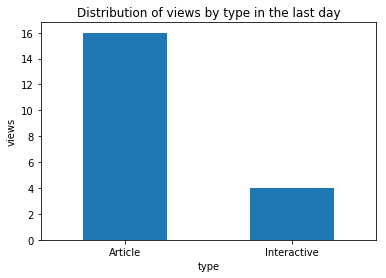

In [70]:
import matplotlib.pyplot as plt
group=viewed.groupby(['type'])['views'].count()
group.plot.bar(rot=0);
plt.title('Distribution of views by type in the last day');
plt.xlabel('type');
plt.ylabel('views');